In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Data exploration

In [5]:
# load dataset
df = pd.read_csv("WorldCS2016_ML.csv")

FileNotFoundError: ignored

In [6]:
df.info()

NameError: ignored

In [7]:
df.head()

NameError: ignored

- Do you have missing data?
- Yes, we can see in "df.info" that some columns don't have the whole 100'000 expected values

In [8]:
# Remove those records with missing data
df = df.dropna()

NameError: ignored

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72510 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Publication type     72510 non-null  object 
 1   Year                 72510 non-null  int64  
 2   Authors              72510 non-null  int64  
 3   CiteScore            72510 non-null  float64
 4   CiteScorePercentile  72510 non-null  float64
 5   Views                72510 non-null  int64  
 6   OpenAccess           72510 non-null  int64  
 7   Affiliations         72510 non-null  int64  
 8   Prominence           72510 non-null  float64
 9   Citations            72510 non-null  int64  
 10  FWCI                 72510 non-null  float64
dtypes: float64(4), int64(6), object(1)
memory usage: 6.6+ MB


- How many records do you have now?
- Now we have 72,510

### Data Understanding

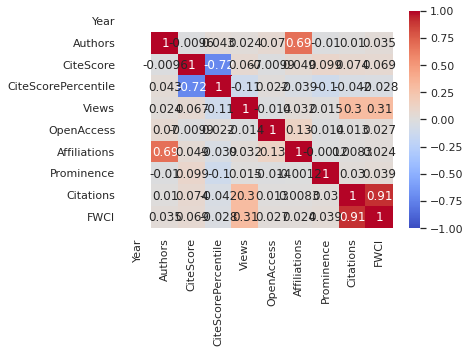

In [ ]:
## Correlation Matrix
sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

sns.heatmap(corr, annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')


- Which are the three highest correlations (pairs of variables)? 
- Citations - FWCL
- CiteScore - CireScorePercentile [negative, but still has high inverse correlation]
- Autor - Affiliation

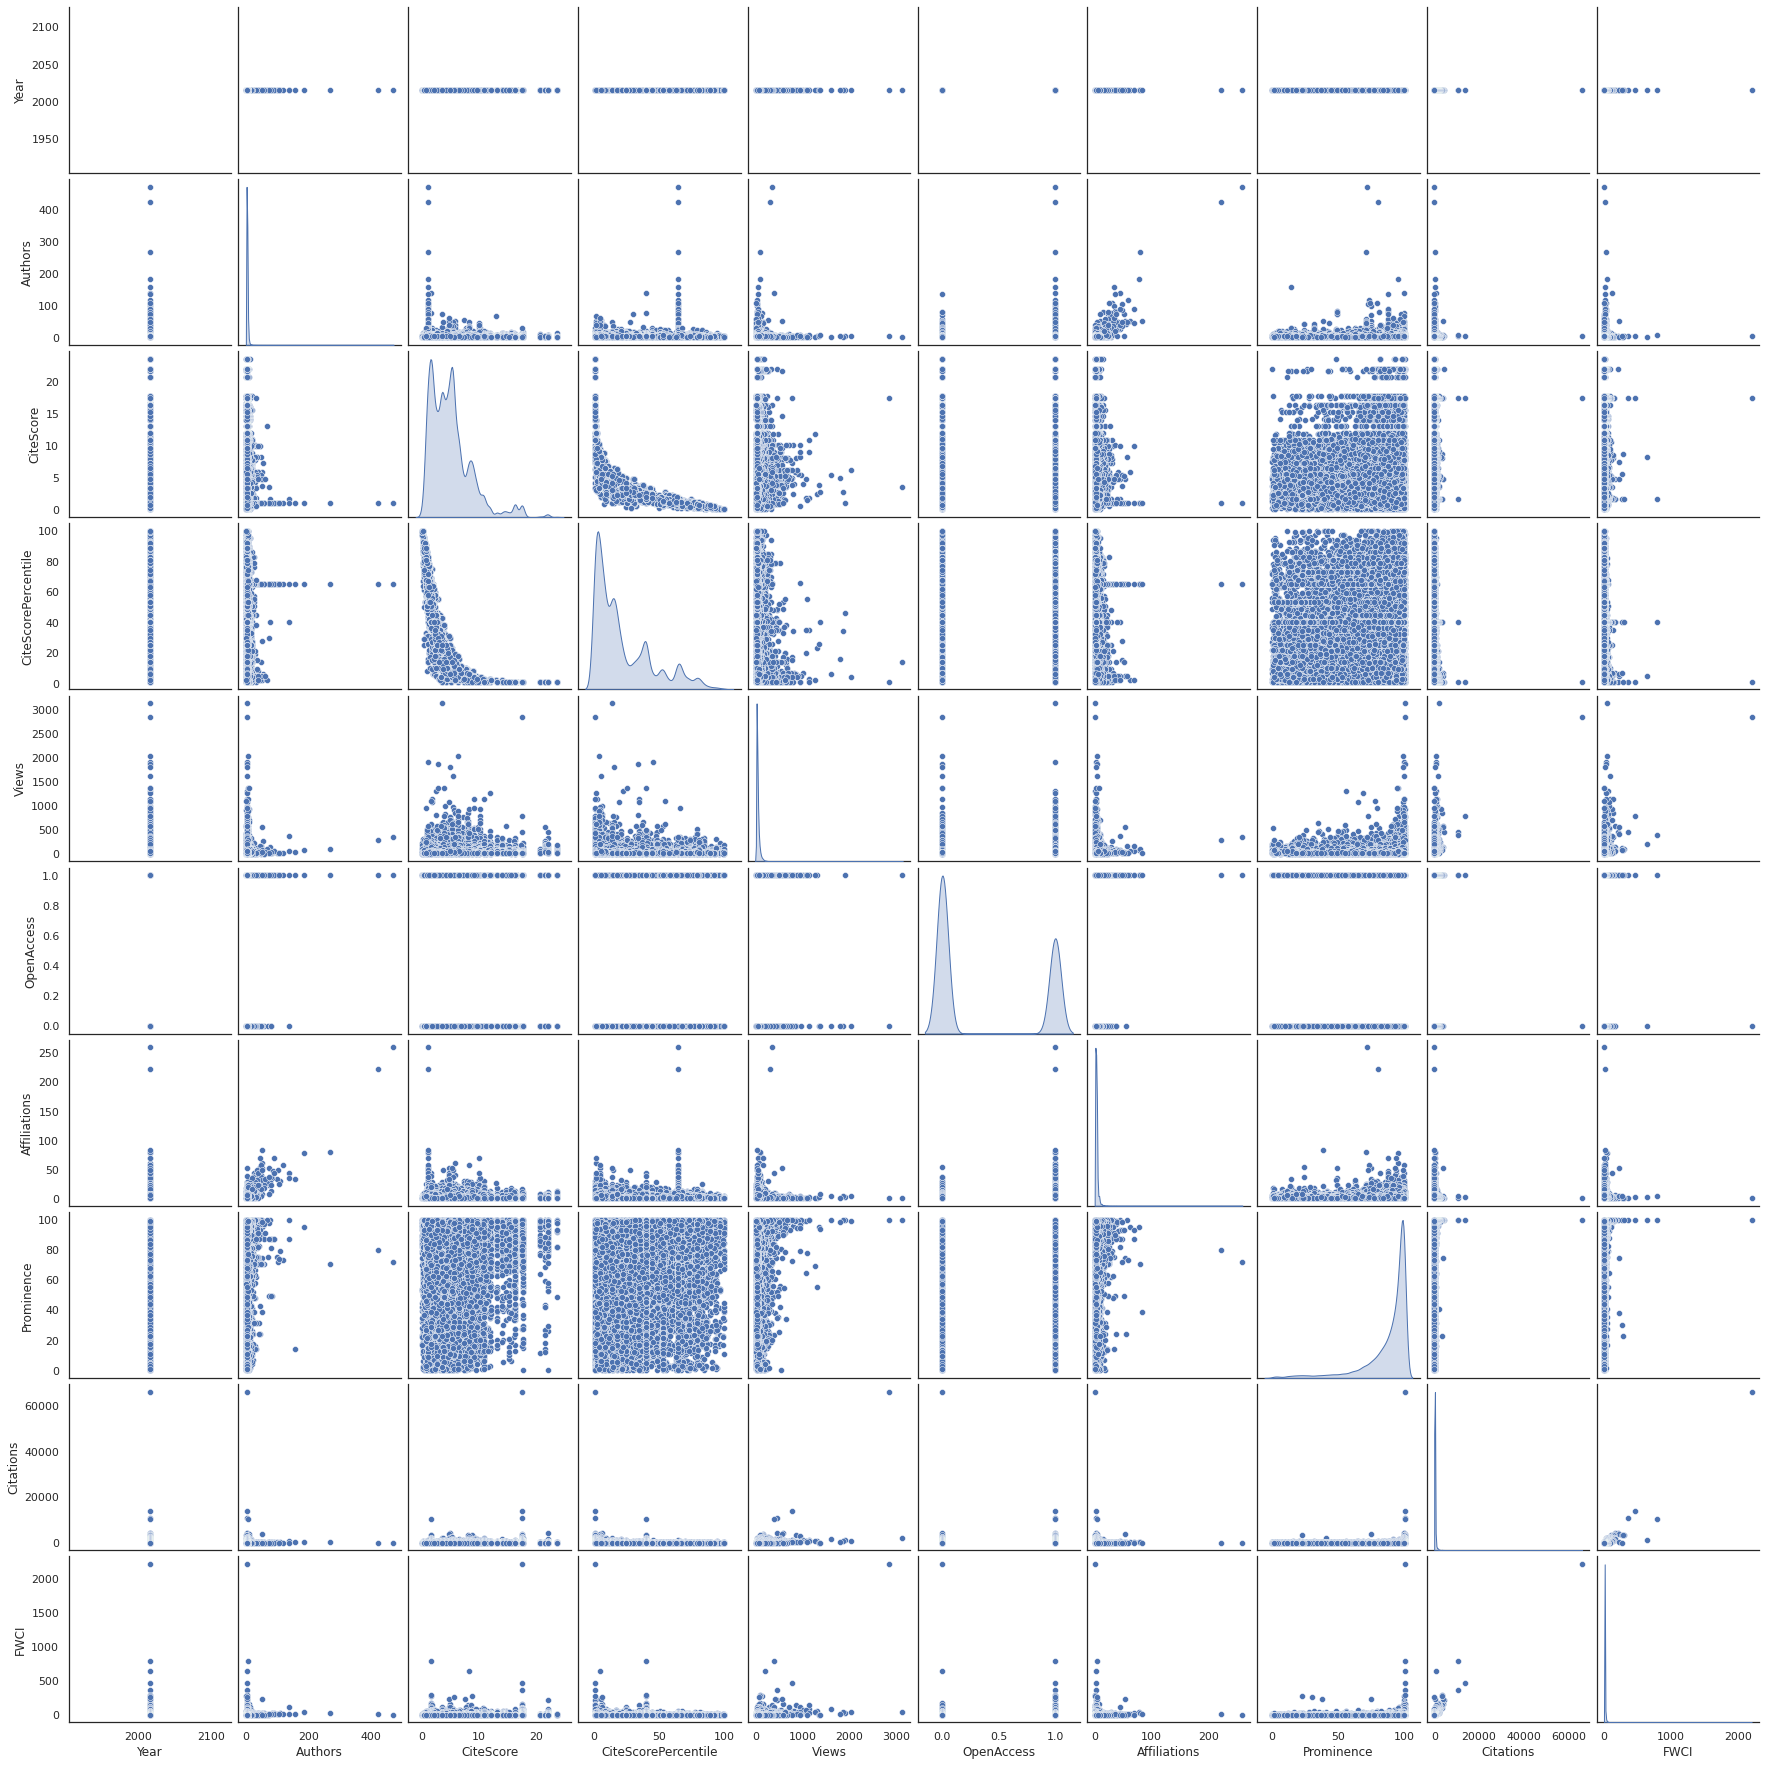

In [ ]:
# Correlogram
sns.pairplot(df, diag_kind="kde")

- Do you observe any outlier in citation? 
- Yes, there are many

In [ ]:
df.head()

,Publication type,Year,Authors,CiteScore,CiteScorePercentile,Views,OpenAccess,Affiliations,Prominence,Citations,FWCI
0,Conference Paper,2016,4,17.4,1.0,2838,0,1,99.998,65928,2208.72
1,Conference Paper,2016,4,17.4,1.0,777,1,3,99.998,13827,467.97
2,Conference Paper,2016,5,17.4,1.0,443,1,2,99.998,10655,358.00
3,Conference Paper,2016,7,1.6,40.0,388,1,4,99.998,10349,792.96
6,Article,2016,4,22.0,1.0,450,1,2,99.622,4200,212.35


Remove the 4 publications with the highest citations.

In [ ]:
# Drop first row by selecting all rows from first row onwards
df = df.iloc[4: , :]

In [ ]:
df.head()

,Publication type,Year,Authors,CiteScore,CiteScorePercentile,Views,OpenAccess,Affiliations,Prominence,Citations,FWCI
6,Article,2016,4,22.0,1.0,450,1,2,99.622,4200,212.35
8,Article,2016,2,4.8,7.0,579,0,2,99.796,4079,162.74
9,Conference Paper,2016,9,17.4,1.0,151,1,4,99.998,3875,151.64
11,Article,2016,53,4.7,5.0,564,1,53,74.633,3767,224.49
13,Conference Paper,2016,3,17.4,1.0,143,1,2,99.622,3466,145.43


- Which variables in the dataset do not provide any information?
- Publication Type and Year do not provide information

Remove not significant variables

In [ ]:
df = df[['Authors','CiteScore','CiteScorePercentile','Views','OpenAccess','Affiliations','Prominence','Citations','FWCI']]

### Simple Linear Regression

- Select three variables for predicting Citations and buil a simple linear model for each one, except for FWCI.
- Plot the residuals for the three models

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
# Model 1
independent = 'Views'
feature_cols = [independent]
X = df[feature_cols] # Features (independent variables)
y = df.Citations # Target variable

## Add intercept/constant
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Citations   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                 1.026e+04
Date:                Wed, 13 Apr 2022   Prob (F-statistic):               0.00
Time:                        15:50:14   Log-Likelihood:            -4.1570e+05
No. Observations:               72506   AIC:                         8.314e+05
Df Residuals:                   72504   BIC:                         8.314e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.2347      0.353     40.362      0.000      13.543      14.926
Views          0.5593      0.006    101.274      0.000       0.548       0.570
==============================================================================
Omnibus:                   164913.857   Durbin-Watson:                   0.237
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1957475723.061
Skew:                          21.714   Prob(JB):                         0.00
Kurtosis:                     806.774   Cond. No.                         81.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

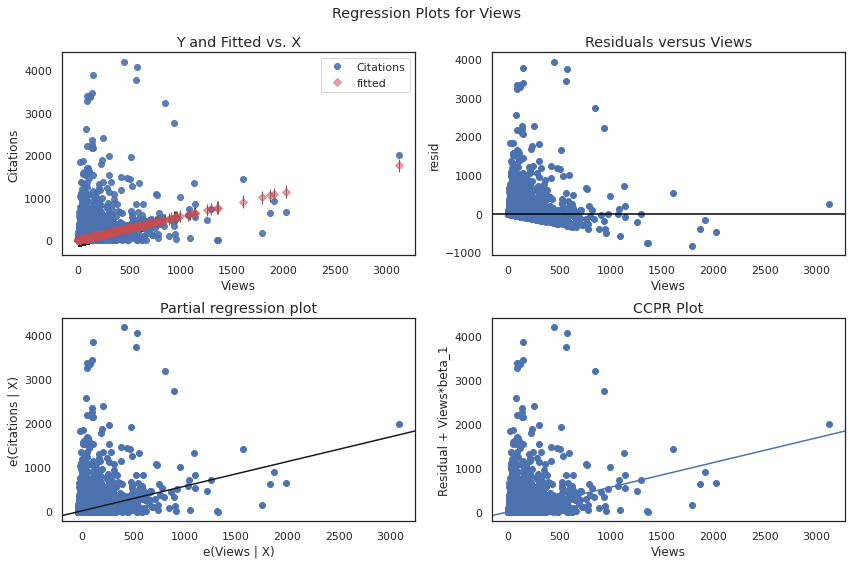

In [ ]:
# Regression plots
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, independent, fig=fig)

In [ ]:
# Model 2
independent = 'Prominence'
feature_cols = [independent]
X = df[feature_cols] # Features (independent variables)
y = df.Citations # Target variable

## Add intercept/constant
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Citations   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     569.0
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          2.83e-125
Time:                        15:50:18   Log-Likelihood:            -4.2021e+05
No. Observations:               72506   AIC:                         8.404e+05
Df Residuals:                   72504   BIC:                         8.405e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8485      1.431      1.990      0.047       0.043       5.654
Prominence     0.3848      0.016     23.854      0.000       0.353       0.416
==============================================================================
Omnibus:                   164178.243   Durbin-Watson:                   0.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1756391788.910
Skew:                          21.527   Prob(JB):                         0.00
Kurtosis:                     764.265   Cond. No.                         430.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

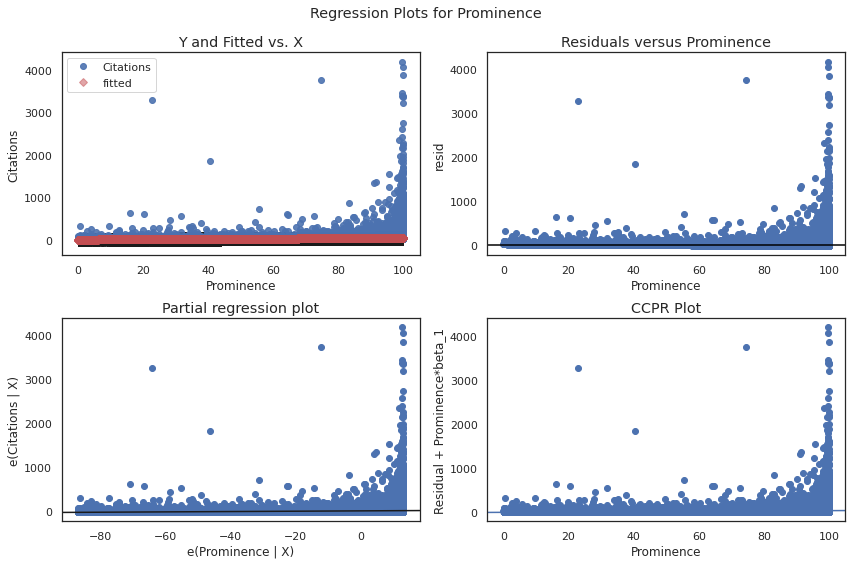

In [ ]:
# Regression plots
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, independent, fig=fig)

In [ ]:
# Model 3
independent = 'Authors'
feature_cols = [independent]
X = df[feature_cols] # Features (independent variables)
y = df.Citations # Target variable

## Add intercept/constant
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Citations   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     70.69
Date:                Wed, 13 Apr 2022   Prob (F-statistic):           4.26e-17
Time:                        15:50:23   Log-Likelihood:            -4.2046e+05
No. Observations:               72506   AIC:                         8.409e+05
Df Residuals:                   72504   BIC:                         8.409e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.7924      0.417     81.095      0.000      32.976      34.609
Authors        0.6310      0.075      8.408      0.000       0.484       0.778
==============================================================================
Omnibus:                   163647.100   Durbin-Watson:                   0.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1710266465.515
Skew:                          21.364   Prob(JB):                         0.00
Kurtosis:                     754.189   Cond. No.                         7.93
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

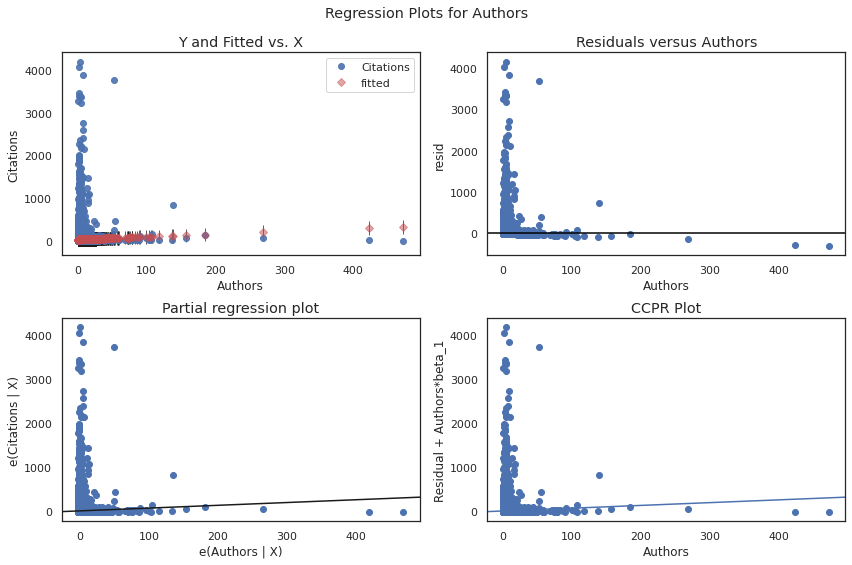

In [ ]:
# Regression plots
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, independent, fig=fig)

- Which was the best model? 
- CCPR model was the best fitted

- Which parameter did you choose to select it?
- 
- Did you observed any not-random pattern in the residual plots?
- 

- Are the intercepts significant?
- 


## Multiple Linear Regression

### Predicting Citations

Learn a Multiple Regression Model to predict Citations with all features, except FWCI, Views and Prominence.

In [ ]:
feature_cols = ['Authors','CiteScore','CiteScorePercentile','OpenAccess','Affiliations']

X = df[feature_cols] # Features (independent variables)
y = df.Citations # Target variable

X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Citations   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     625.7
Date:                Wed, 13 Apr 2022   Prob (F-statistic):               0.00
Time:                        15:50:27   Log-Likelihood:            -4.1897e+05
No. Observations:               72506   AIC:                         8.379e+05
Df Residuals:                   72500   BIC:                         8.380e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   5.9698      1.027      5.815      0.000       3.958       7.982
Authors                 0.6205      0.102      6.097      0.000       0.421       0.820
CiteScore               4.7166      0.116     40.778      0.000       4.490       4.943
CiteScorePercentile     0.0867      0.019      4.584      0.000       0.050       0.124
OpenAccess              7.3898      0.605     12.208      0.000       6.203       8.576
Affiliations           -0.0677      0.150     -0.451      0.652      -0.362       0.227
==============================================================================
Omnibus:                   165358.929   Durbin-Watson:                   0.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1871482407.376
Skew:                          21.891   Prob(JB):                         0.00
Kurtosis:                     788.848   Cond. No.                         114.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Are all coefficients significant?
-
- Do you have any multicollinearity problem?
- 

Remove non-significant coefficients until getting a valid regression model (all p-values <= 0.05)

In [ ]:
feature_cols = ['Authors','CiteScore','CiteScorePercentile','OpenAccess']

X = df[feature_cols] # Features (independent variables)
y = df.Citations # Target variable

X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

### Predicting FWCI

Learn a Multiple Regression Model to predict FWCI with all features, except Citations, Views and Prominence.

#### Train a valid model without intercept.

## Model selection

Make a result table with all valid models indicating:
- Dependent variable (Target)
- Indepent variable(s)
- Adj. R2
- F-Statistics
- All coefficients significant (p-value >= 0.05)? (Yes/No)
- Condition No.

| Target | Predictors | Adj. R2 | F-Statistic | p-value<0.05 | Cond. No. | 
|---|---|---|---|---|---|
| x | y |   |   |   |   |
|---|---|---|---|---|---|

#### Choose the 3 best models and justify why
- 
- 
- 

#### Write down the linear equation of these models
- 
-
-

#### Answer the following questions:
- Does collaboration increases citation?
- 
- Does Open Access improves the citation expectation?
- 